#Principal Components Analysis (PCA)

https://towardsdatascience.com/principal-components-analysis-pca-fundamentals-benefits-insights-for-industry-2f03ad18c4d7

Dimensions reduction is usually seen as a practical way to reduce the number of features within a large dataset without losing its significance (= variance). The immediate benefit is a reduction of the computation power and time needed for modeling. I will explain below why this is much more than that!

### Input Data & Forecast value

<img src="https://miro.medium.com/max/972/1*foB2cfjPCgHVnSyon293pQ.gif
" alt="drawing" width="600"/>



In [ ]:
# Colab and Google Sheets — Surprisingly Powerful Combination for Data Science
# https://medium.com/analytics-vidhya/colab-and-google-sheets-surprisingly-powerful-combination-for-data-science-part-1-bbbb11cbd8e

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
#@title Load event data
import pandas as pd

df_link = 'https://docs.google.com/spreadsheets/d/18d_IOxvcy9h7TsdLXmzHA7-vyLKO9GvKqMwWEjKV3TA/edit?usp=sharing'
wb = gc.open_by_url(df_link)

df = pd.DataFrame( wb.worksheet('events').get_all_values())
df.columns = df.iloc[0]
df = df[1:]

df.columns = ['ds', 'y']
df['y'] = df.y.astype(int)
df['ds'] = pd.to_datetime(df["ds"]).dt.date

df.tail()

,ds,y
193,2020-07-11,476239
194,2020-07-12,481112
195,2020-07-13,486220
196,2020-07-14,490565
197,2020-07-15,498693


In [ ]:
#@title Load order data
import pandas as pd

df_link = 'https://docs.google.com/spreadsheets/d/18d_IOxvcy9h7TsdLXmzHA7-vyLKO9GvKqMwWEjKV3TA/edit?usp=sharing'
wb = gc.open_by_url(df_link)

df_order = pd.DataFrame( wb.worksheet('orders').get_all_values())
df_order.columns = df_order.iloc[0]
df_order = df_order[1:]

df_order.columns = ['ds', 'y']
df_order['y'] = df_order['y'].astype(int)
df_order['ds'] = pd.to_datetime(df_order["ds"]).dt.date

df_order.head()

,ds,y
1,2020-01-01,35253
2,2020-01-02,38444
3,2020-01-03,37890
4,2020-01-04,41462
5,2020-01-05,40437


In [ ]:
#@title Line Chart

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig = make_subplots(rows=1, 
                    cols=2, 
                    subplot_titles=('Daily No. of Events', 
                                    'Daily Orders'))


fig.add_trace(go.Scatter(x = df.ds, y = df.y,
                    mode='lines',
                    name='Daily Events'),
              row = 1, col = 1
                )

fig.add_trace(go.Scatter(x = df_order.ds, y = df_order.y,
                    mode='lines',
                    name='Daily Orders'),
              row = 1, col = 2
                )

## Layout
fig.update_layout(
    autosize=False,
    width=1200,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig.show()


In [ ]:
#@title import Prophet
# Python

from fbprophet import Prophet

In [ ]:
#@title model.fit()
# https://facebook.github.io/prophet/docs/quick_start.html#python-api

model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#@title make_future_dataframe()
future = model.make_future_dataframe(periods=30)

print(future.shape)
future.tail()

(227, 1)


,ds
222,2020-08-10
223,2020-08-11
224,2020-08-12
225,2020-08-13
226,2020-08-14


The **predict** method will assign each row in **future** a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The **forecast** object here is a new dataframe that includes a column **yhat** with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
#@title print predictions

forecast = model.predict(future)

print(forecast.shape)
print('columns :', forecast.columns)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

(227, 16)
columns : Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


,ds,yhat,yhat_lower,yhat_upper
222,2020-08-10,466931.805491,446780.463493,487360.152375
223,2020-08-11,470175.268701,449212.615575,491193.447957
224,2020-08-12,464468.615868,442683.536179,485778.474730
225,2020-08-13,470314.949877,449672.195613,490942.449414
226,2020-08-14,466426.019423,445574.010600,488031.426259


You can plot the forecast by calling the **Prophet.plot** method and passing in your forecast dataframe.

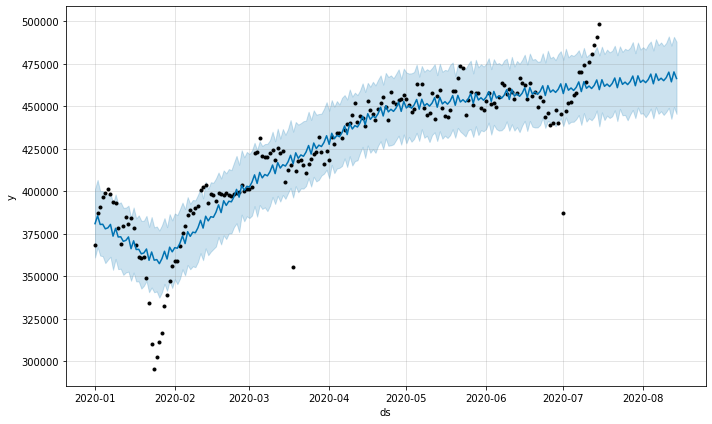

In [ ]:
#@title model.plot()
fig1 = model.plot(forecast)


If you want to see the forecast components, you can use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

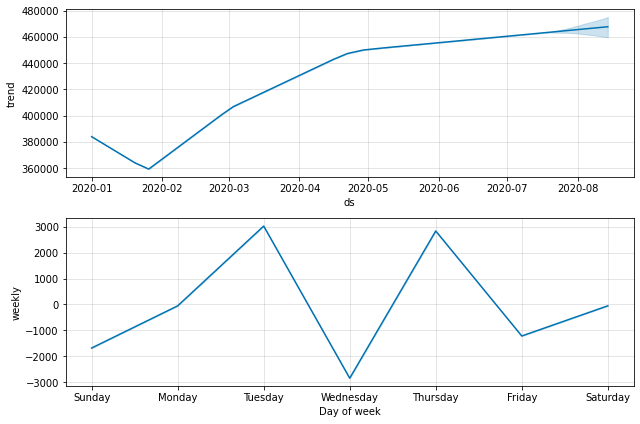

In [ ]:
#@title model.plot_components()
fig2 = model.plot_components(forecast)


# Interactive Chart
An interactive figure of the forecast and components can be created with plotly. You will need to install plotly 4.0 or above separately, as it will not by default be installed with fbprophet. You will also need to install the notebook and ipywidgets packages.

In [ ]:
#@title plot_plotly(model, df)

from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
#@title plot_components_plotly(model, df)

plot_components_plotly(model, forecast)

# info214

In [ ]:
#@title Load Data

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

from datetime import datetime
from google.cloud import bigquery

client = bigquery.Client( 'shopline-142003')

print( 'Query Start : ', datetime.now())

raw_data = client.query('''

WITH orders_gmv AS (
SELECT
    o.*,
    total_cents_in_usd * c.exchange_rate AS total_cents_exchanged,
    subtotal_cents_in_usd * c.exchange_rate AS subtotal_cents_exchanged
FROM (
  SELECT 
    seller_id,
    total_cents,
    total_cents_in_usd,
    subtotal_cents_in_usd,
    created_at
    
  FROM 
    `shopline-test.looker_prod.orders_hourly` as orders_hourly
  WHERE
      orders_hourly.last_fulfilled_at IS NOT NULL AND
      orders_hourly.status <> 'removed' AND
      orders_hourly.customer_type = 'User'
    ) o,
    (SELECT exchange_rate FROM `shopline-test.looker_prod.currency` WHERE iso_code = 'USD' ) c
WHERE
  total_cents_in_usd * (SELECT exchange_rate FROM `shopline-test.looker_prod.currency` WHERE iso_code = 'HKD') < 50000 OR
  -- Whitelist B2B merchants
  seller_id IN ('599455136ef2d44cd7000ab6', '5b6fb9f833e33c0017ffc639', '5be538edc0d24a0001abfcff', '586cada059d52493f3000cb3', '5cc813ba527c4b0001a31e32')

)

SELECT 
    DATE(created_at, 'Asia/Taipei') AS ds,
    CAST( SUM(total_cents)  AS INT64 )AS y
FROM 
  orders_gmv
WHERE 
  DATE(created_at, 'Asia/Taipei') >= '2019-01-01'
  AND DATE(created_at, 'Asia/Taipei') <= '2021-05-26'
#   AND DATE(created_at, 'Asia/Taipei') < DATE(TIMESTAMP_SUB(TIMESTAMP_TRUNC(TIMESTAMP(FORMAT_TIMESTAMP('%F %H:%M:%E*S', CURRENT_TIMESTAMP(), 'Asia/Taipei')), DAY), INTERVAL 1 DAY))
  AND seller_id IN (SELECT DISTINCT _id FROM `shopline-test.looker_prod.merchants_hourly` WHERE handle = 'info214')
GROUP BY 
  ds
ORDER BY 
  ds

''' ).to_dataframe()

print( 'Query Done : ', datetime.now())
print(raw_data.shape)

raw_data.tail(5)

Authenticated
Query Start :  2021-06-09 02:06:07.011428
Query Done :  2021-06-09 02:06:10.578860
(877, 2)


,ds,y
872,2021-05-22,160620
873,2021-05-23,219675
874,2021-05-24,190715
875,2021-05-25,143032
876,2021-05-26,404169


In [ ]:
#@title Plot Line Chart

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

df = raw_data.copy()

# Create traces
fig = go.Figure()
fig = make_subplots(rows=1, 
                    cols=1, 
                    subplot_titles=('Daily GMV', 
                                    'GMV'))


fig.add_trace(go.Scatter(x = df.ds, y = df.y,
                    mode='lines',
                    name='GMV'),
              row = 1, col = 1
                )

## Layout
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig.show()


In [ ]:
#@title m.fit(df)
df = raw_data.copy()

m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# predict
future = m.make_future_dataframe(periods=30)

print(future.shape)
future.tail()

(907, 1)


,ds
902,2021-06-21
903,2021-06-22
904,2021-06-23
905,2021-06-24
906,2021-06-25


,ds,yhat,yhat_lower,yhat_upper
877,2021-05-27,555435.119188,-326121.280332,1.427572e+06
878,2021-05-28,387747.272079,-465420.656421,1.291396e+06
879,2021-05-29,276928.258954,-556591.662194,1.127405e+06
880,2021-05-30,257952.342947,-675418.329438,1.075032e+06
881,2021-05-31,434860.903945,-387319.854547,1.277202e+06
882,2021-06-01,397283.844330,-453805.703167,1.283993e+06
883,2021-06-02,499866.370429,-388094.459133,1.315938e+06
884,2021-06-03,551381.756366,-325745.990025,1.399586e+06
885,2021-06-04,413699.480151,-421247.644540,1.283069e+06
886,2021-06-05,331181.720112,-517157.216672,1.185992e+06


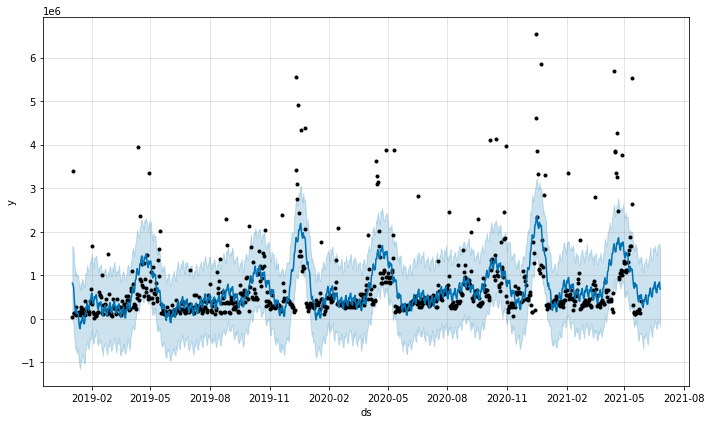

In [ ]:
#@title Predict
forecast = m.predict(future)

fig1 = m.plot(forecast)

fig1.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

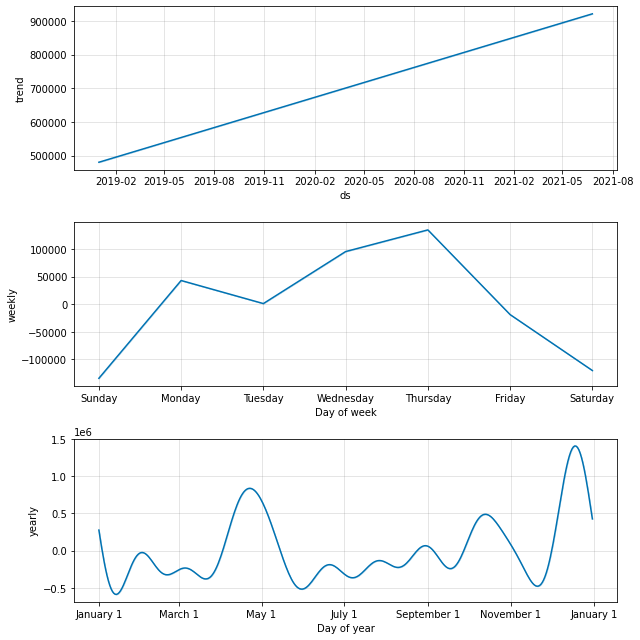

In [ ]:
# Python
fig2 = m.plot_components(forecast)


In [ ]:
forecast[['ds','trend']]

## Seasonality, Holiday Effects, And Regressors

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


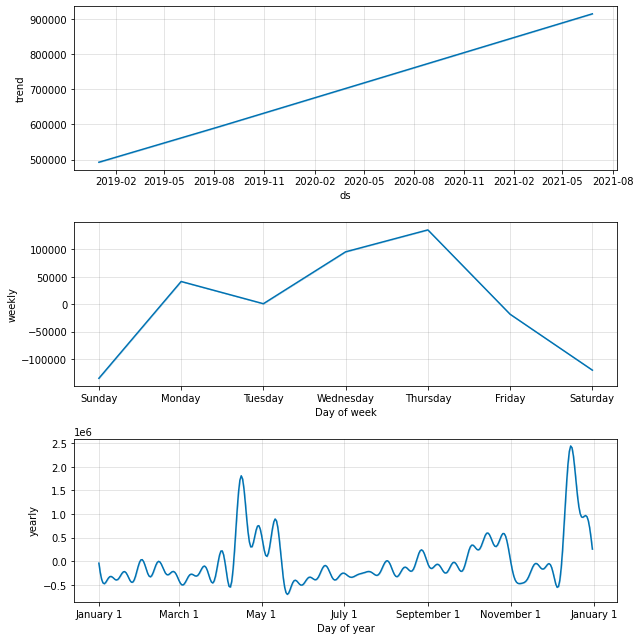

In [ ]:
# https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html
#@title plot
from fbprophet.plot import plot_yearly

m = Prophet(yearly_seasonality=30)

m.fit(df)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

fig3 = m.plot_components(forecast)
# a = plot_yearly(m)

,ds,yhat,yhat_lower,yhat_upper
877,2021-05-27,615850.582117,-164410.679338,1.343443e+06
878,2021-05-28,429376.722735,-346818.655283,1.157341e+06
879,2021-05-29,294833.248087,-455262.623371,1.062195e+06
880,2021-05-30,260735.096548,-495691.133624,1.086237e+06
881,2021-05-31,439184.309791,-367216.288354,1.194074e+06
882,2021-06-01,422599.381652,-362640.916948,1.238817e+06
883,2021-06-02,556491.300108,-284838.506441,1.363826e+06
884,2021-06-03,640611.823332,-163413.493485,1.406206e+06
885,2021-06-04,524442.704098,-305982.446099,1.238591e+06
886,2021-06-05,444577.483239,-328685.199929,1.167381e+06


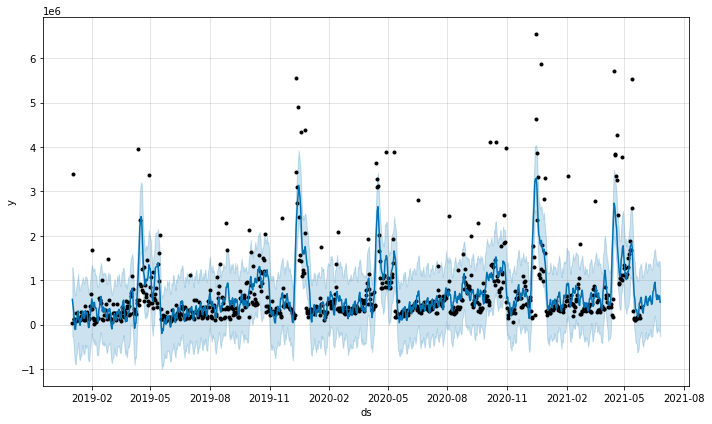

In [ ]:
#@title Predict
forecast = m.predict(future)

fig1 = m.plot(forecast)

fig1.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

In [ ]:
df_trend = forecast[['ds','trend']]
df_trend = df_trend[df_trend.ds >= '2021-04-01']
df_trend

,ds,trend
821,2021-04-01,29206.518821
822,2021-04-02,29222.277154
823,2021-04-03,29238.035486
824,2021-04-04,29253.793819
825,2021-04-05,29269.552152
...,...,...
902,2021-06-21,30482.943762
903,2021-06-22,30498.702094
904,2021-06-23,30514.460427
905,2021-06-24,30530.218759


In [ ]:
#@title Slope of trend
import numpy as np
from scipy.stats import linregress

y = df_trend.trend
x = np.linspace(0, len(y)-1, len(y))

slope, intercept, r_value, p_value, std_err = linregress(x, y)

print('slope =', slope)
print('intercept =', intercept)
print('r_value =', r_value)
print('p_value =', p_value)
print('std_err =', std_err)

slope = 15.758332596206102
intercept = 29206.518821301237
r_value = 1.0
p_value = 0.0
std_err = 0.0


In [ ]:
#@title Plot Line Chart
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x = x, y = y,
                    mode='lines',
                    name='trend'))

fig.show()
